In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import scipy
from fooof import FOOOFGroup
from fooof.sim.gen import gen_aperiodic
from model import create_model

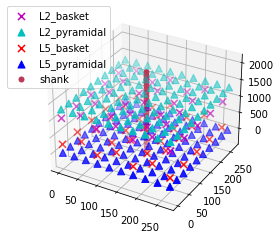

In [2]:
n_trials=100
n_electrodes=25

net_ds = create_model()
_ = net_ds.plot_cells()

In [3]:
ds_trial_signals=np.load('shank_ds.npy')
us_trial_signals=np.load('shank_us.npy')

**Compute power spectra over whole trial**

In [4]:
srate=int(1000/.025)

winsize=int(srate*.1)
overlap=int(winsize*.5)
freq_lims=[0.5, 250]

# Compute power spectral density from STFT - detected stimuli
freqs, times, Zxx = scipy.signal.stft(ds_trial_signals, fs=srate, window='hann', nperseg=winsize,
                                      noverlap=overlap, nfft=int(winsize * 20), detrend='constant',
                                      return_onesided=True, boundary='zeros', padded=True, axis=-1)
ds_layer_psd = np.abs(Zxx) ** 2
f_idx=(freqs>=freq_lims[0]) & (freqs<freq_lims[1])
freqs=freqs[f_idx]
ds_layer_psd=ds_layer_psd[:,:,f_idx,:]
mds_layer_psd=np.mean(ds_layer_psd,axis=-1)

# Compute power spectral density from STFT - undetected stimuli
freqs, times, Zxx = scipy.signal.stft(us_trial_signals, fs=srate, window='hann', nperseg=winsize,
                                      noverlap=overlap, nfft=int(winsize * 20), detrend='constant',
                                      return_onesided=True, boundary='zeros', padded=True, axis=-1)
us_layer_psd = np.abs(Zxx) ** 2
f_idx=(freqs>=freq_lims[0]) & (freqs<freq_lims[1])
freqs=freqs[f_idx]
us_layer_psd=us_layer_psd[:,:,f_idx,:]
mus_layer_psd=np.mean(us_layer_psd,axis=-1)

**Parameterize power spectra**

In [5]:
# Parameterize detected spectra
ds_layer_offsets=np.zeros((n_trials,n_electrodes))
ds_layer_slopes=np.zeros((n_trials,n_electrodes))
ds_layer_aperiodic=np.zeros((n_trials,n_electrodes,len(freqs)))
for t in range(mds_layer_psd.shape[0]):
    trial_psd=mds_layer_psd[t,:,:]
    
    fg = FOOOFGroup()
    fg.fit(freqs,trial_psd, freq_lims)
    for i in range(trial_psd.shape[0]):
        ds_layer_offsets[t,i]=fg[i].aperiodic_params[0]
        ds_layer_slopes[t,i]=fg[i].aperiodic_params[1]
        ds_layer_aperiodic[t,i,:]=gen_aperiodic(freqs,fg[i].aperiodic_params)

# Parameterize undetected spectra
us_layer_offsets=np.zeros((n_trials,n_electrodes))
us_layer_slopes=np.zeros((n_trials,n_electrodes))
us_layer_aperiodic=np.zeros((n_trials,n_electrodes,len(freqs)))
for t in range(mus_layer_psd.shape[0]):
    trial_psd=mus_layer_psd[t,:,:]
    
    fg = FOOOFGroup()
    fg.fit(freqs,trial_psd, freq_lims)
    for i in range(trial_psd.shape[0]):
        us_layer_offsets[t,i]=fg[i].aperiodic_params[0]
        us_layer_slopes[t,i]=fg[i].aperiodic_params[1]
        us_layer_aperiodic[t,i,:]=gen_aperiodic(freqs,fg[i].aperiodic_params)

Running FOOOFGroup across 25 power spectra.

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

Running FOOOFGroup across 25 power spectra.

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

Running FOOOFGroup across 25 power spectra.

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lo

Running FOOOFGroup across 25 power spectra.

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

Running FOOOFGroup across 25 power spectra.

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

Running FOOOFGroup across 25 power spectra.

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lo

Running FOOOFGroup across 25 power spectra.

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

Running FOOOFGroup across 25 power spectra.

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

Running FOOOFGroup across 25 power spectra.

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lo

Running FOOOFGroup across 25 power spectra.

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

Running FOOOFGroup across 25 power spectra.

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

Running FOOOFGroup across 25 power spectra.

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lo

Running FOOOFGroup across 25 power spectra.

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

Running FOOOFGroup across 25 power spectra.

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

Running FOOOFGroup across 25 power spectra.

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lo

Running FOOOFGroup across 25 power spectra.

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

Running FOOOFGroup across 25 power spectra.

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

Running FOOOFGroup across 25 power spectra.

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lo

Running FOOOFGroup across 25 power spectra.

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

Running FOOOFGroup across 25 power spectra.

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

Running FOOOFGroup across 25 power spectra.

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lo

Running FOOOFGroup across 25 power spectra.

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

Running FOOOFGroup across 25 power spectra.

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

Running FOOOFGroup across 25 power spectra.

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lo

Running FOOOFGroup across 25 power spectra.

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

Running FOOOFGroup across 25 power spectra.

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

Running FOOOFGroup across 25 power spectra.

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lo

Running FOOOFGroup across 25 power spectra.

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

Running FOOOFGroup across 25 power spectra.

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

Running FOOOFGroup across 25 power spectra.

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lo

**Plot spectra and parameters**

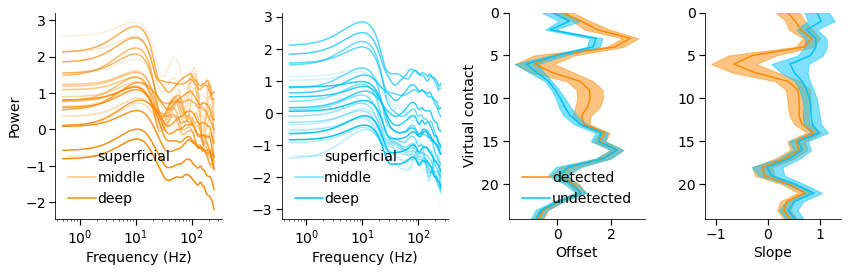

In [8]:
plt.rcParams.update({
    'font.size': 14,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'xtick.major.size': 6,
    'xtick.major.width': 1.2,
    'ytick.major.size': 6,
    'ytick.major.width': 1.2,
    'legend.frameon': False,
    'legend.handletextpad': 0.1,
    'svg.fonttype': 'none',
    'text.usetex': False
})

fig=plt.figure(figsize=(12,4))
undetected_color=np.array([0,76.5,99.2])/100
detected_color=np.array([98.4,54.1,1.2])/100

gs = GridSpec(1, 4, width_ratios=[.275, .275, .225, .225])

ax1=fig.add_subplot(gs[0])
#m_detected=np.mean(ds_layer_aperiodic,axis=0)
m_detected=np.log10(np.mean(mds_layer_psd,axis=0))
ax1.set_xscale('log')
#ax1.set_yscale('log')
for i in range(n_electrodes):
    label=None
    if i==5:
        label='superficial'
    if i==12:
        label='middle'
    if i==24:
        label='deep'
    ax1.plot(freqs,m_detected[i,:],color=detected_color,alpha=(i+1)/n_electrodes,label=label)
plt.legend()
# ax1.set_xlim([.1,125])
ax1.set_xlabel('Frequency (Hz)')
ax1.set_ylabel('Power')
    
ax2=fig.add_subplot(gs[1])
# m_undetected=np.mean(us_layer_aperiodic,axis=0)
m_undetected=np.log10(np.mean(mus_layer_psd,axis=0))
ax2.set_xscale('log')
# ax2.set_yscale('log')
for i in range(n_electrodes):
    label=None
    if i==5:
        label='superficial'
    if i==12:
        label='middle'
    if i==24:
        label='deep'
    ax2.plot(freqs,m_undetected[i,:],color=undetected_color,alpha=(i+1)/n_electrodes,label=label)
plt.legend()
#ax2.set_xlim([.1,125])
ax2.set_xlabel('Frequency (Hz)')

ax3=fig.add_subplot(gs[2])
m_detected=np.mean(ds_layer_offsets,axis=0)
se_detected=np.std(ds_layer_offsets,axis=0)
ax3.plot(m_detected,np.arange(n_electrodes),
         label='detected',
         color=detected_color)
ax3.fill_betweenx(np.arange(n_electrodes),
                  m_detected-se_detected,
                  m_detected+se_detected,
                  alpha=0.5,
                  color=detected_color)

m_undetected=np.mean(us_layer_offsets,axis=0)
se_undetected=np.std(us_layer_offsets,axis=0)
ax3.plot(m_undetected,
         np.arange(n_electrodes),
         label='undetected',
         color=undetected_color)
ax3.fill_betweenx(np.arange(n_electrodes),
                  m_undetected-se_undetected,
                  m_undetected+se_undetected,
                  alpha=0.5,
                  color=undetected_color)
ax3.set_ylim([n_electrodes-1,0])
ax3.set_ylabel('Virtual contact')
ax3.set_xlabel('Offset')
ax3.legend(loc='lower right')

ax4=fig.add_subplot(gs[3])
m_detected=np.mean(ds_layer_slopes,axis=0)
se_detected=np.std(ds_layer_slopes,axis=0)
ax4.plot(m_detected,np.arange(n_electrodes),
         label='detected',
         color=detected_color)
ax4.fill_betweenx(np.arange(n_electrodes),
                  m_detected-se_detected,
                  m_detected+se_detected,
                  alpha=0.5,
                  color=detected_color)

m_undetected=np.mean(us_layer_slopes,axis=0)
se_undetected=np.std(us_layer_slopes,axis=0)
ax4.plot(m_undetected,
         np.arange(n_electrodes),
         label='undetected',
         color=undetected_color)
ax4.fill_betweenx(np.arange(n_electrodes),
                  m_undetected-se_undetected,
                  m_undetected+se_undetected,
                  alpha=0.5,
                  color=undetected_color)
ax4.set_ylim([n_electrodes-1,0])
ax4.set_xlabel('Slope')

plt.tight_layout()
# plt.savefig('aan-e_i.svg')
# plt.savefig('aan-e_i.png')

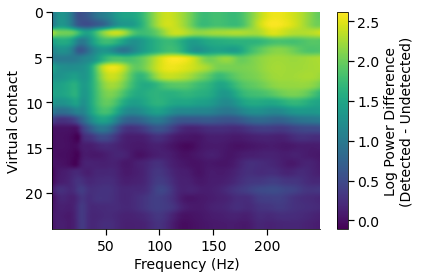

In [19]:
plt.figure()
m_detected=np.log10(np.mean(mds_layer_psd,axis=0))
m_undetected=np.log10(np.mean(mus_layer_psd,axis=0))
im=plt.imshow(m_detected-m_undetected,aspect='auto',extent=(freqs[0], freqs[-1], n_electrodes-1, 0))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Virtual contact')
cbar=plt.colorbar(im)
cbar.set_label('Log Power Difference\n(Detected - Undetected)')

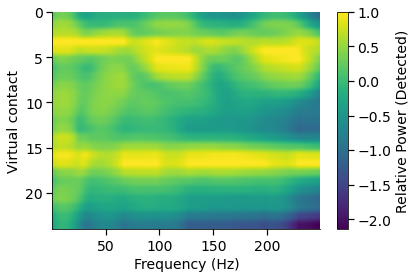

In [25]:
ds_rel_power=np.zeros((n_electrodes,len(freqs)))
for i in range(len(freqs)):
    ds_rel_power[:,i]=m_detected[:,i]/np.max(m_detected[:,i])
im=plt.imshow(ds_rel_power,aspect='auto',extent=(freqs[0], freqs[-1], n_electrodes-1, 0))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Virtual contact')
cbar=plt.colorbar(im)
cbar.set_label('Relative Power (Detected)')

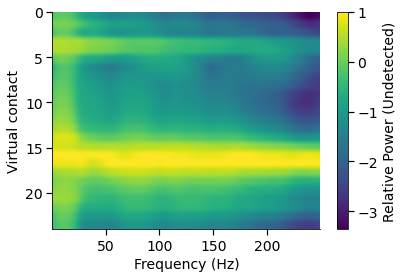

In [26]:
us_rel_power=np.zeros((n_electrodes,len(freqs)))
for i in range(len(freqs)):
    us_rel_power[:,i]=m_undetected[:,i]/np.max(m_undetected[:,i])
im=plt.imshow(us_rel_power,aspect='auto',extent=(freqs[0], freqs[-1], n_electrodes-1, 0))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Virtual contact')
cbar=plt.colorbar(im)
cbar.set_label('Relative Power (Undetected)')

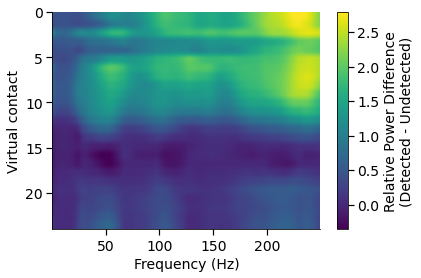

In [27]:
im=plt.imshow(ds_rel_power-us_rel_power,aspect='auto',extent=(freqs[0], freqs[-1], n_electrodes-1, 0))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Virtual contact')
cbar=plt.colorbar(im)
cbar.set_label('Relative Power Difference\n(Detected - Undetected)')

**Compute power spectra over whole trial after subtracting out mean response**

In [29]:
# Compute power spectral density from STFT after subtracting mean - detected stimuli
ds_mean=np.mean(ds_trial_signals,axis=0)
freqs, times, Zxx = scipy.signal.stft(ds_trial_signals-ds_mean, fs=srate, window='hann', nperseg=winsize,
                                      noverlap=overlap, nfft=int(winsize * 20), detrend='constant',
                                      return_onesided=True, boundary='zeros', padded=True, axis=-1)
ds_layer_resid_psd = np.abs(Zxx) ** 2
f_idx=(freqs>=freq_lims[0]) & (freqs<freq_lims[1])
freqs=freqs[f_idx]
ds_layer_resid_psd=ds_layer_resid_psd[:,:,f_idx,:]
mds_layer_resid_psd=np.mean(ds_layer_resid_psd,axis=-1)


# Compute power spectral density from STFT after subtracting mean - undetected stimuli
us_mean=np.mean(us_trial_signals,axis=0)
freqs, times, Zxx = scipy.signal.stft(us_trial_signals-us_mean, fs=srate, window='hann', nperseg=winsize,
                                      noverlap=overlap, nfft=int(winsize * 20), detrend='constant',
                                      return_onesided=True, boundary='zeros', padded=True, axis=-1)
us_layer_resid_psd = np.abs(Zxx) ** 2
f_idx=(freqs>=freq_lims[0]) & (freqs<freq_lims[1])
freqs=freqs[f_idx]
us_layer_resid_psd=us_layer_resid_psd[:,:,f_idx,:]
mus_layer_resid_psd=np.mean(us_layer_resid_psd,axis=-1)

**Parameterize power spectra**

In [30]:
ds_layer_resid_offsets=np.zeros((n_trials,n_electrodes))
ds_layer_resid_slopes=np.zeros((n_trials,n_electrodes))
ds_layer_resid_aperiodic=np.zeros((n_trials,n_electrodes,len(freqs)))
for t in range(mds_layer_resid_psd.shape[0]):
    trial_psd=mds_layer_resid_psd[t,:,:]
    
    fg = FOOOFGroup()
    fg.fit(freqs,trial_psd, freq_lims)
    for i in range(trial_psd.shape[0]):
        ds_layer_resid_offsets[t,i]=fg[i].aperiodic_params[0]
        ds_layer_resid_slopes[t,i]=fg[i].aperiodic_params[1]
        ds_layer_resid_aperiodic[t,i,:]=gen_aperiodic(freqs,fg[i].aperiodic_params)

us_layer_resid_offsets=np.zeros((n_trials,n_electrodes))
us_layer_resid_slopes=np.zeros((n_trials,n_electrodes))
us_layer_resid_aperiodic=np.zeros((n_trials,n_electrodes,len(freqs)))
for t in range(mus_layer_resid_psd.shape[0]):
    trial_psd=mus_layer_resid_psd[t,:,:]
    
    fg = FOOOFGroup()
    fg.fit(freqs,trial_psd, freq_lims)
    for i in range(trial_psd.shape[0]):
        us_layer_resid_offsets[t,i]=fg[i].aperiodic_params[0]
        us_layer_resid_slopes[t,i]=fg[i].aperiodic_params[1]
        us_layer_resid_aperiodic[t,i,:]=gen_aperiodic(freqs,fg[i].aperiodic_params)

Running FOOOFGroup across 25 power spectra.

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

Running FOOOFGroup across 25 power spectra.

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

Running FOOOFGroup across 25 power spectra.

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lo

Running FOOOFGroup across 25 power spectra.

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

Running FOOOFGroup across 25 power spectra.

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

Running FOOOFGroup across 25 power spectra.

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lo

Running FOOOFGroup across 25 power spectra.

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

Running FOOOFGroup across 25 power spectra.

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

Running FOOOFGroup across 25 power spectra.

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lo

Running FOOOFGroup across 25 power spectra.

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

Running FOOOFGroup across 25 power spectra.

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

Running FOOOFGroup across 25 power spectra.

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lo

Running FOOOFGroup across 25 power spectra.

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

Running FOOOFGroup across 25 power spectra.

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

Running FOOOFGroup across 25 power spectra.

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lo

Running FOOOFGroup across 25 power spectra.

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

Running FOOOFGroup across 25 power spectra.

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

Running FOOOFGroup across 25 power spectra.

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lo

Running FOOOFGroup across 25 power spectra.

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

Running FOOOFGroup across 25 power spectra.

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

Running FOOOFGroup across 25 power spectra.

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lo

Running FOOOFGroup across 25 power spectra.

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

Running FOOOFGroup across 25 power spectra.

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

Running FOOOFGroup across 25 power spectra.

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lo

Running FOOOFGroup across 25 power spectra.

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

Running FOOOFGroup across 25 power spectra.

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

Running FOOOFGroup across 25 power spectra.

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lo

Running FOOOFGroup across 25 power spectra.

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

Running FOOOFGroup across 25 power spectra.

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

Running FOOOFGroup across 25 power spectra.

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lo

**Plot spectra and parameters**

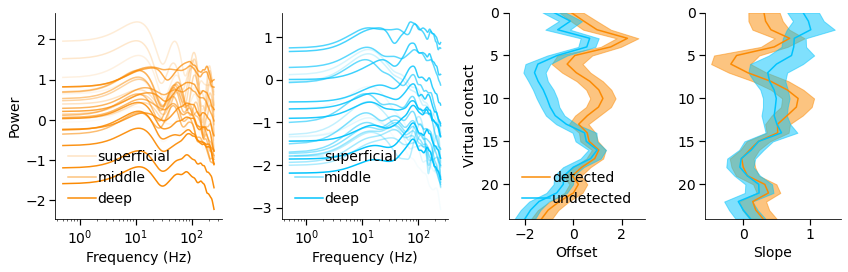

In [31]:
plt.rcParams.update({
    'font.size': 14,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'xtick.major.size': 6,
    'xtick.major.width': 1.2,
    'ytick.major.size': 6,
    'ytick.major.width': 1.2,
    'legend.frameon': False,
    'legend.handletextpad': 0.1,
    'svg.fonttype': 'none',
    'text.usetex': False
})

fig=plt.figure(figsize=(12,4))
undetected_color=np.array([0,76.5,99.2])/100
detected_color=np.array([98.4,54.1,1.2])/100

gs = GridSpec(1, 4, width_ratios=[.275, .275, .225, .225])

ax1=fig.add_subplot(gs[0])
#m_detected=np.mean(ds_layer_aperiodic,axis=0)
m_detected=np.log10(np.mean(mds_layer_resid_psd,axis=0))
ax1.set_xscale('log')
# ax1.set_yscale('log')
for i in range(n_electrodes):
    label=None
    if i==5:
        label='superficial'
    if i==12:
        label='middle'
    if i==24:
        label='deep'
    ax1.plot(freqs,m_detected[i,:],color=detected_color,alpha=(i+1)/n_electrodes,label=label)
plt.legend()
# ax1.set_xlim([.1,125])
ax1.set_xlabel('Frequency (Hz)')
ax1.set_ylabel('Power')
    
ax2=fig.add_subplot(gs[1])
# m_undetected=np.mean(us_layer_aperiodic,axis=0)
m_undetected=np.log10(np.mean(mus_layer_resid_psd,axis=0))
ax2.set_xscale('log')
# ax2.set_yscale('log')
for i in range(n_electrodes):
    label=None
    if i==5:
        label='superficial'
    if i==12:
        label='middle'
    if i==24:
        label='deep'
    ax2.plot(freqs,m_undetected[i,:],color=undetected_color,alpha=(i+1)/n_electrodes,label=label)
plt.legend()
#ax2.set_xlim([.1,125])
ax2.set_xlabel('Frequency (Hz)')

ax3=fig.add_subplot(gs[2])
m_detected=np.mean(ds_layer_resid_offsets,axis=0)
se_detected=np.std(ds_layer_resid_offsets,axis=0)
ax3.plot(m_detected,np.arange(n_electrodes),
         label='detected',
         color=detected_color)
ax3.fill_betweenx(np.arange(n_electrodes),
                  m_detected-se_detected,
                  m_detected+se_detected,
                  alpha=0.5,
                  color=detected_color)

m_undetected=np.mean(us_layer_resid_offsets,axis=0)
se_undetected=np.std(us_layer_resid_offsets,axis=0)
ax3.plot(m_undetected,
         np.arange(n_electrodes),
         label='undetected',
         color=undetected_color)
ax3.fill_betweenx(np.arange(n_electrodes),
                  m_undetected-se_undetected,
                  m_undetected+se_undetected,
                  alpha=0.5,
                  color=undetected_color)
ax3.set_ylim([n_electrodes-1,0])
ax3.set_ylabel('Virtual contact')
ax3.set_xlabel('Offset')
ax3.legend(loc='lower right')

ax4=fig.add_subplot(gs[3])
m_detected=np.mean(ds_layer_resid_slopes,axis=0)
se_detected=np.std(ds_layer_resid_slopes,axis=0)
ax4.plot(m_detected,np.arange(n_electrodes),
         label='detected',
         color=detected_color)
ax4.fill_betweenx(np.arange(n_electrodes),
                  m_detected-se_detected,
                  m_detected+se_detected,
                  alpha=0.5,
                  color=detected_color)

m_undetected=np.mean(us_layer_resid_slopes,axis=0)
se_undetected=np.std(us_layer_resid_slopes,axis=0)
ax4.plot(m_undetected,
         np.arange(n_electrodes),
         label='undetected',
         color=undetected_color)
ax4.fill_betweenx(np.arange(n_electrodes),
                  m_undetected-se_undetected,
                  m_undetected+se_undetected,
                  alpha=0.5,
                  color=undetected_color)
ax4.set_ylim([n_electrodes-1,0])
ax4.set_xlabel('Slope')

plt.tight_layout()
# plt.savefig('aan-e_i.svg')
# plt.savefig('aan-e_i.png')

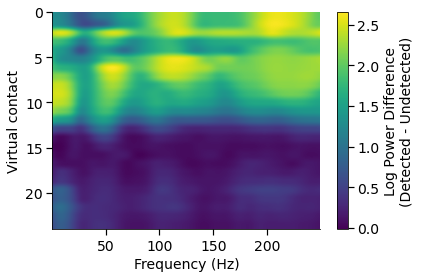

In [32]:
plt.figure()
m_detected=np.log10(np.mean(mds_layer_resid_psd,axis=0))
m_undetected=np.log10(np.mean(mus_layer_resid_psd,axis=0))
im=plt.imshow(m_detected-m_undetected,aspect='auto',extent=(freqs[0], freqs[-1], n_electrodes-1, 0))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Virtual contact')
cbar=plt.colorbar(im)
cbar.set_label('Log Power Difference\n(Detected - Undetected)')

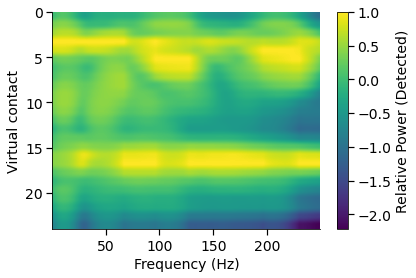

In [33]:
ds_rel_power=np.zeros((n_electrodes,len(freqs)))
for i in range(len(freqs)):
    ds_rel_power[:,i]=m_detected[:,i]/np.max(m_detected[:,i])
im=plt.imshow(ds_rel_power,aspect='auto',extent=(freqs[0], freqs[-1], n_electrodes-1, 0))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Virtual contact')
cbar=plt.colorbar(im)
cbar.set_label('Relative Power (Detected)')

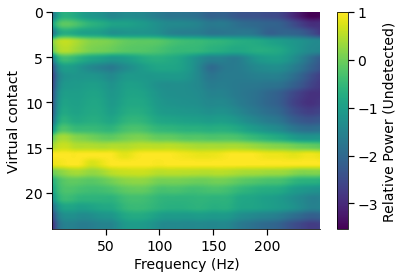

In [34]:
us_rel_power=np.zeros((n_electrodes,len(freqs)))
for i in range(len(freqs)):
    us_rel_power[:,i]=m_undetected[:,i]/np.max(m_undetected[:,i])
im=plt.imshow(us_rel_power,aspect='auto',extent=(freqs[0], freqs[-1], n_electrodes-1, 0))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Virtual contact')
cbar=plt.colorbar(im)
cbar.set_label('Relative Power (Undetected)')

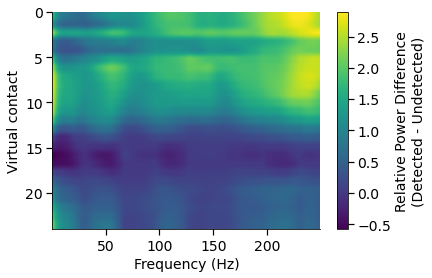

In [35]:
im=plt.imshow(ds_rel_power-us_rel_power,aspect='auto',extent=(freqs[0], freqs[-1], n_electrodes-1, 0))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Virtual contact')
cbar=plt.colorbar(im)
cbar.set_label('Relative Power Difference\n(Detected - Undetected)')